In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
from etrain.plots import WatermarkFigure, plot_cfg, set_style

plot_cfg["watermark_text"] = ""
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

this_file = (
    Path(
        "/home/emiz/projects/sv_SEdecaytime/docs/content/etrains_in_TPC_regions/drift_dep_history.py"
    )
    .resolve()
    .parent
)

df = pd.read_csv(this_file / "figs/drift_dep_history.csv")

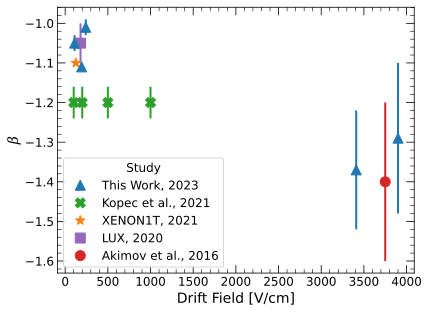

In [4]:
# | label: drift-dependence-history

fig, ax = plt.subplots(FigureClass=WatermarkFigure)
ax.set_prop_cycle(
    marker=["o", "X", "s", "^", "*"],
    color=["tab:red", "tab:green", "tab:purple", "tab:blue", "tab:orange"],
)

# scatter doesn't work with propcycle so use line with lines removed
df.groupby("Work").plot(
    x="Drift Field [V/cm]",
    y="beta",
    kind="line",
    linestyle="None",
    ax=ax,
    yerr="yerr",
    ylabel=r"$\beta$",
)

# Make a legend with labels in the order of our choosing

# Get unique pairs of work/year, sorted by Work to match the groupby
artist_df = df.drop_duplicates(["Work", "Year"]).sort_values("Work")[["Work", "Year"]]

# Get the line artists and labels
artist_df["lines"] = [*ax.get_lines()]
artist_df["labels"] = [
    f"{lbl[0]}, {lbl[1]}" for lbl in zip(artist_df["Work"], artist_df["Year"])
]
artist_df.sort_values(by="Year", inplace=True, ascending=False)

ax.legend(
    handles=artist_df["lines"].to_list(),
    title="Study",
    labels=artist_df["labels"].to_list(),
)
fig.watermark_axes()

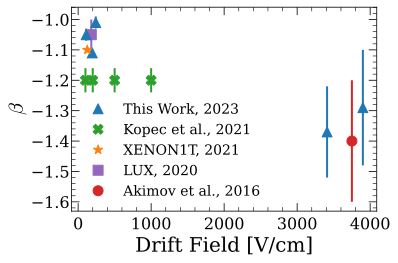

In [8]:
# | label: drift-dep-history-ebg-paper
# variant for LZ electron backgrounds paper

set_style("lz_ebg_paper")

fig, ax = plt.subplots(FigureClass=WatermarkFigure)
ax.set_prop_cycle(
    marker=["o", "X", "s", "^", "*"],
    color=["tab:red", "tab:green", "tab:purple", "tab:blue", "tab:orange"],
)

# scatter doesn't work with propcycle so use line with lines removed
df.groupby("Work").plot(
    x="Drift Field [V/cm]",
    y="beta",
    kind="line",
    linestyle="None",
    ax=ax,
    yerr="yerr",
    ylabel=r"$\beta$",
)

# Make a legend with labels in the order of our choosing

# Get unique pairs of work/year, sorted by Work to match the groupby
artist_df = df.drop_duplicates(["Work", "Year"]).sort_values("Work")[["Work", "Year"]]

# Get the line artists and labels
artist_df["lines"] = [*ax.get_lines()]
artist_df["labels"] = [
    f"{lbl[0]}, {lbl[1]}" for lbl in zip(artist_df["Work"], artist_df["Year"])
]
artist_df.sort_values(by="Year", inplace=True, ascending=False)

ax.legend(
    title="",
    frameon=False,
    ncols=1,
    handles=artist_df["lines"].to_list(),
    labels=artist_df["labels"].to_list(),
)
fig.savefig("figs/drift-dep-history-ebg-paper.pdf", bbox_inches="tight")
set_style()